# Fake News Detection Model

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

2025-03-29 20:45:09.411659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743277509.504311    4581 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743277509.531229    4581 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-29 20:45:09.762991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
dfTrue = pd.read_csv("data/True.csv")
dfFake = pd.read_csv("data/Fake.csv")

In [3]:
dfTrue.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
dfFake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
dfTrue.iloc[2,1]

'WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It

In [6]:
dfTrue["label"] = 1
dfFake["label"] = 0

In [7]:
df = pd.concat([dfTrue,dfFake])
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [9]:
df['text_length'] = df['text'].apply(len)

## Text cleaning and processing

In [10]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/szymons3234/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/szymons3234/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Usunięcie znaków
    words = word_tokenize(text)  # Tokenizacja
    words = [word for word in words if word not in stopwords.words('english')]  # Usunięcie stop-words
    return " ".join(words)

In [13]:
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()

,title,text,subject,date,label,text_length,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,4659,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,4077,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,2789,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,2461,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,5204,seattlewashington reuters president donald tru...


## EDA

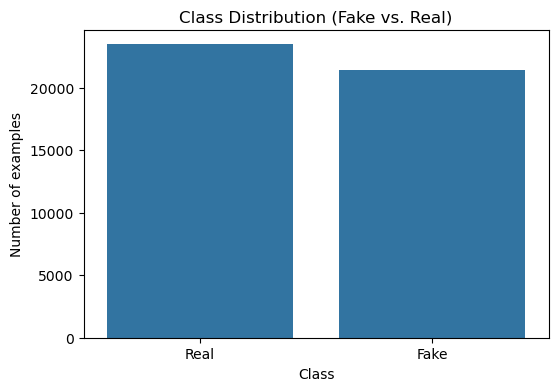

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Class Distribution (Fake vs. Real)")
plt.xlabel("Class")
plt.ylabel("Number of examples")
plt.xticks(ticks=[0, 1], labels=["Real", "Fake"])
plt.show()

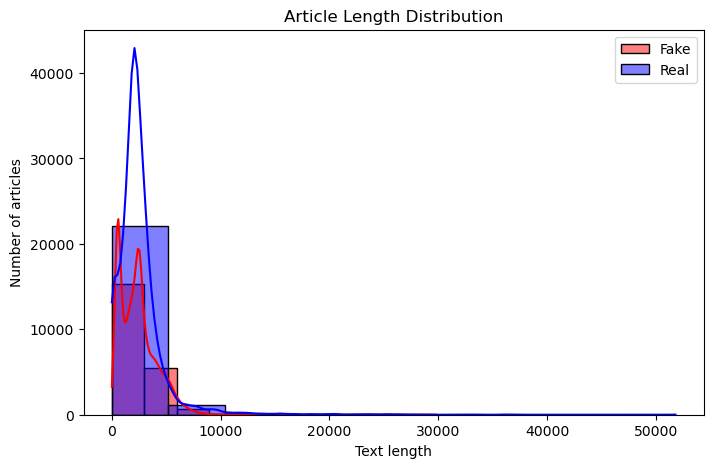

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df[df["label"] == 1]["text_length"], bins=10, color="red", label="Fake", kde=True)
sns.histplot(df[df["label"] == 0]["text_length"], bins=10, color="blue", label="Real", kde=True)
plt.legend()
plt.title("Article Length Distribution")
plt.xlabel("Text length")
plt.ylabel("Number of articles")
plt.show()

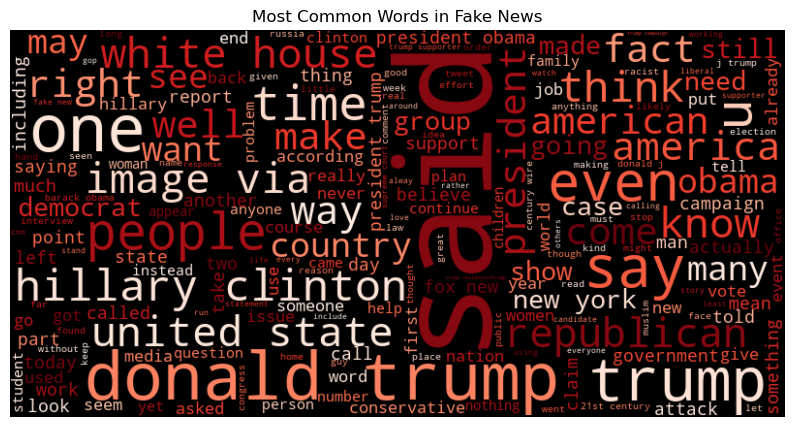

In [16]:
from wordcloud import WordCloud
fake_text = " ".join(df[df["label"] == 0]["clean_text"])

plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(fake_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")
plt.show()

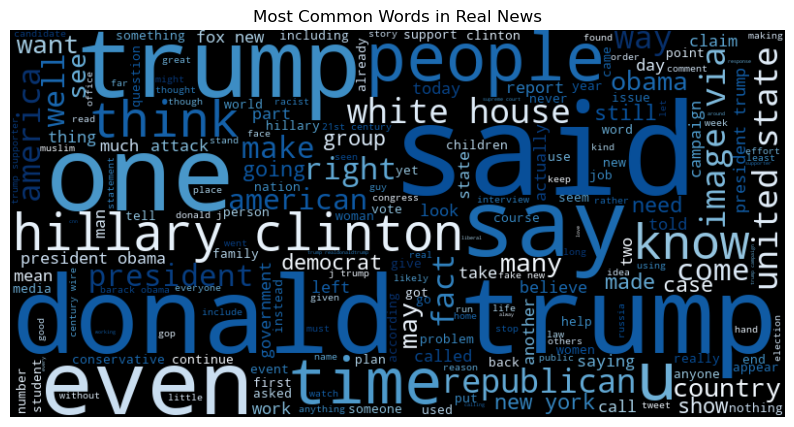

In [17]:
from wordcloud import WordCloud
real_text = " ".join(df[df["label"] == 1]["clean_text"])

plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Blues").generate(fake_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")
plt.show()

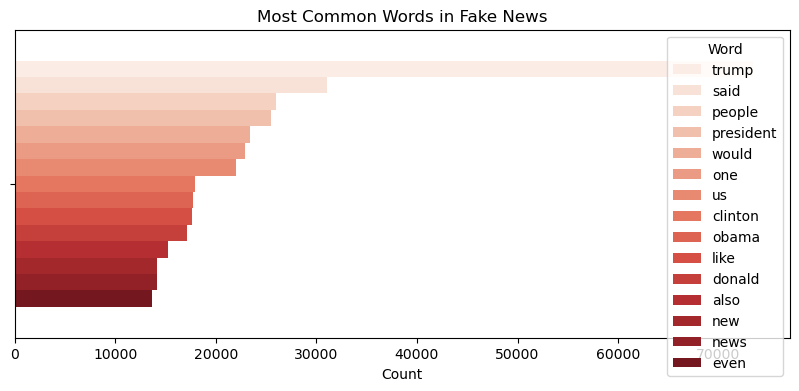

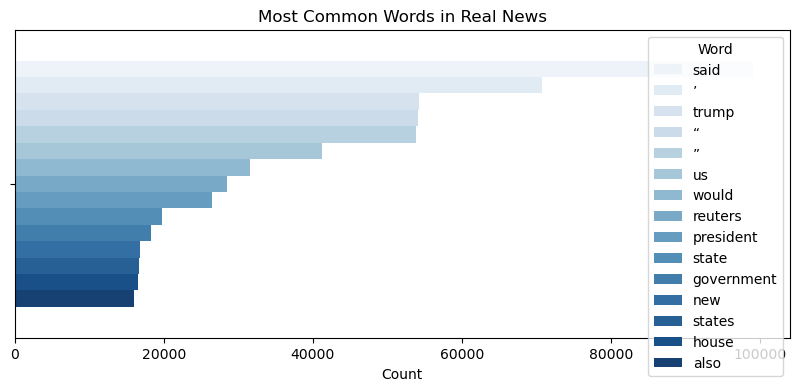

In [18]:
from collections import Counter

# Tokenizacja wszystkich słów
fake_words = " ".join(df[df["label"] == 0]["clean_text"]).split()
real_words = " ".join(df[df["label"] == 1]["clean_text"]).split()

# Znalezienie 15 najczęstszych słów
fake_common = Counter(fake_words).most_common(15)
real_common = Counter(real_words).most_common(15)

# Tworzenie DataFrame dla wizualizacji
fake_df = pd.DataFrame(fake_common, columns=["Word", "Count"])
real_df = pd.DataFrame(real_common, columns=["Word", "Count"])

# Wykres słów w fake newsach
plt.figure(figsize=(10,4))
sns.barplot(x="Count", hue="Word", data=fake_df, palette="Reds")
plt.title("Most Common Words in Fake News")
plt.show()

# Wykres słów w prawdziwych artykułach
plt.figure(figsize=(10,4))
sns.barplot(x="Count", hue="Word", data=real_df, palette="Blues")
plt.title("Most Common Words in Real News")
plt.show()


## Tokenization and sequences

In [19]:
MAX_VOCAB_SIZE = 10_000
MAX_SEQUENCE_LENGTH = 500

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE,oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_text"])

In [20]:
X = tokenizer.texts_to_sequences(df["clean_text"])
X = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)
y = df["label"].values

## Training and test sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model building

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=MAX_VOCAB_SIZE,output_dim=128,input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/szymons3234/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1743278423.378502    4581 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:26:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10


I0000 00:00:1743278426.844923    4704 cuda_dnn.cc:529] Loaded cuDNN version 90300


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 103s 87ms/step - accuracy: 0.8989 - loss: 0.2529 - val_accuracy: 0.9853 - val_loss: 0.0432
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 101s 90ms/step - accuracy: 0.9918 - loss: 0.0306 - val_accuracy: 0.9960 - val_loss: 0.0140
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 96s 85ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9970 - val_loss: 0.0092
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 102s 91ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9990 - val_loss: 0.0029
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 102s 91ms/step - accuracy: 0.9997 - loss: 6.4632e-04 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 106s 96ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9988 - val_loss: 0.0037
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 102s 91ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 0.9983 - val_loss: 0.0117
Epoch 8/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 97s 87ms/step - accuracy: 0.9999 - 

In [24]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
Accuracy: 0.9994432071269488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [25]:
def predict_fake_news(model, tokenizer, text, max_length=100):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    probability = model.predict(padded_sequence)[0][0]
    predicted_class = int(probability > 0.05)

    return probability, predicted_class

In [26]:
#Real
probability, prediction = predict_fake_news(model, tokenizer, "WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loomed over the White House since Trump took office in January. It shows no sign of receding as Trump prepares for his second year in power")
print(f"Probability: {probability:.4f}, Prediction: {'FAKE' if prediction == 0 else 'REAL'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Probability: 1.0000, Prediction: REAL


In [30]:
#Fake
probability, prediction = predict_fake_news(model, tokenizer, "On June 12, 2016, a gunman opened fire at the Pulse nightclub in Orlando, Florida, killing 49 people and injuring 53 more. The shooting, which targeted the LGBTQ+ community, was one of the deadliest mass shootings in U.S. history at the time. The attack was classified as an act of terrorism, and it sparked debates over gun control, terrorism, and LGBTQ+ rights.")
print(f"Probability: {probability:.4f}, Prediction: {'FAKE' if prediction == 0 else 'REAL'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Probability: 0.0002, Prediction: FAKE


In [31]:
#Fake
probability, prediction = predict_fake_news(model, tokenizer, "At the Democratic National Convention in Philadelphia, Hillary Clinton made history by becoming the first woman ever to be nominated for president by a major political party. Her nomination came after a hard-fought primary battle with Vermont Senator Bernie Sanders. Clinton’s acceptance speech at the convention marked a historic moment in American politics, even though she ultimately lost the election to Donald Trump later that year.")
print(f"Probability: {probability:.4f}, Prediction: {'FAKE' if prediction == 0 else 'REAL'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Probability: 0.0002, Prediction: FAKE


In [32]:
model.save("model.keras")

In [33]:
import json
# Zapisanie tokenizera do pliku JSON
tokenizer_json = tokenizer.to_json()

# Zapisz tokenizer do pliku
with open('tokenizer.json', 'w') as f:
    json.dump(tokenizer_json, f)

print("Tokenizer has been saved to tokenizer.json.")

Tokenizer has been saved to tokenizer.json.
